<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [26]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [27]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, f_oneway, pearsonr

#### Read the dataset in the csv file from the URL


In [28]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [29]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Descriptive Statistics and Visualizations

 #### Median value of owner-occupied homes

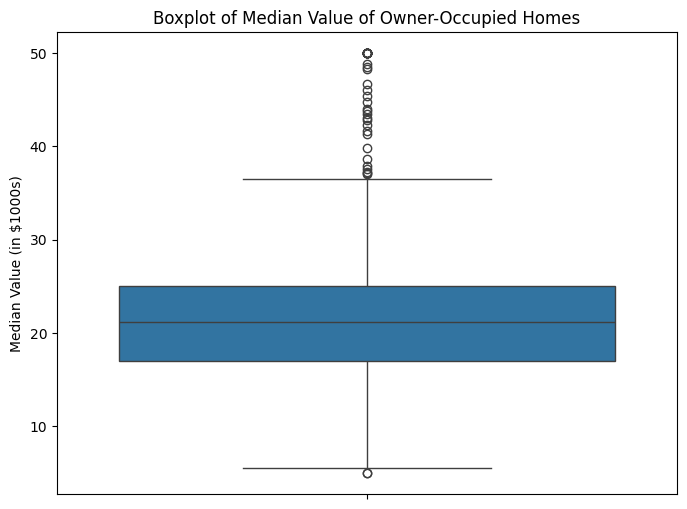

In [7]:
# Plot the boxplot for Median value of owner-occupied homes (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()

#### Bar plot for the Charles river variable

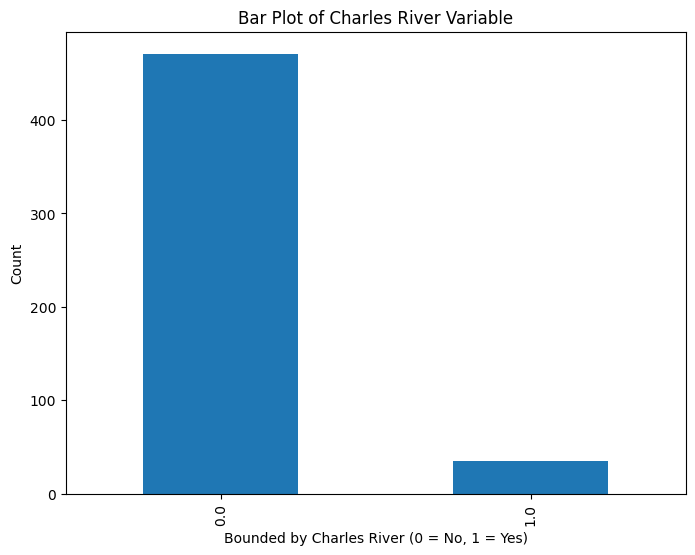

In [10]:
# Plot the bar plot for Charles River variable (CHAS)
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Bounded by Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### Boxplot for the MEDV variable vs the AGE variable.

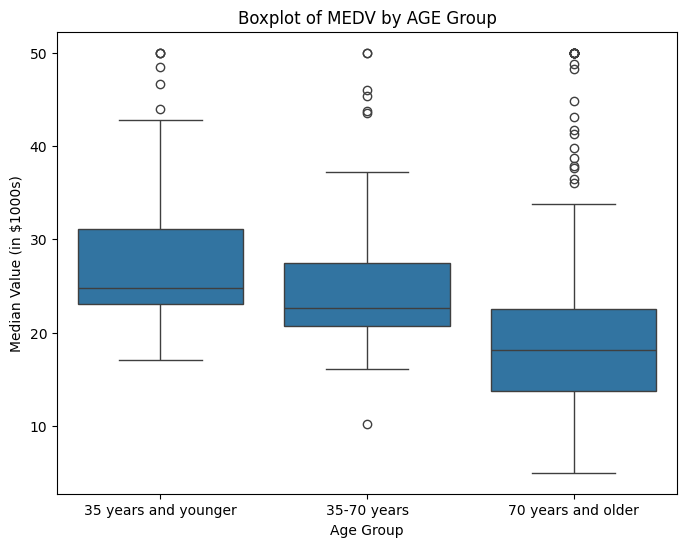

In [31]:
# Discretize the age variable
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], 
                                labels=['35 years and younger', '35-70 years', '70 years and older'])

# Plot the boxplot for the MEDV variable vs the AGE variable.
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

#### Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

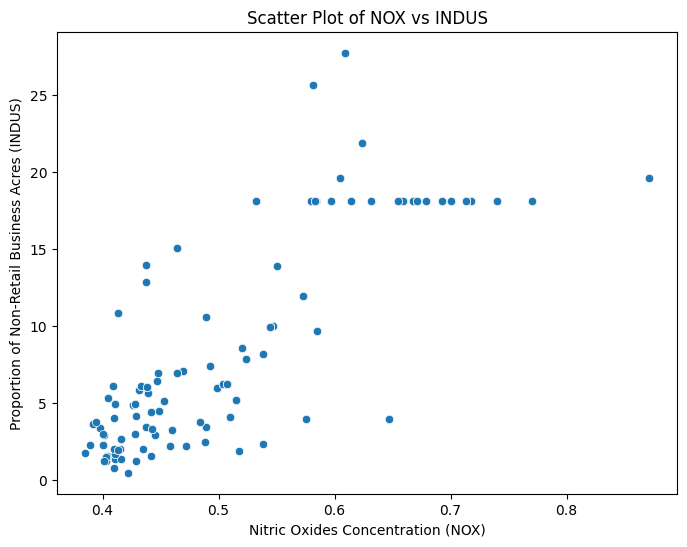

In [21]:
# Plot the scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxides Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

#### Description:
Based on the graph, there is a positive correlation between NOX and INDUS, as they increase together, but it is not perfectly linear. Some points appear to be outliers.

#### Histogram for the pupil to teacher ratio variable

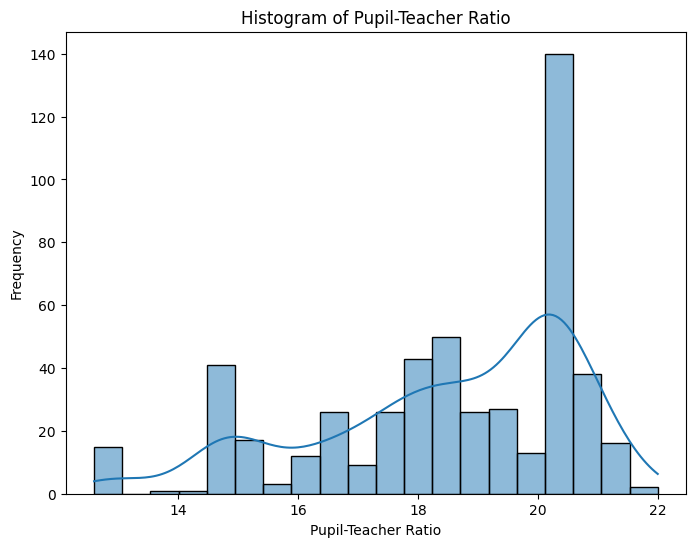

In [14]:
# Plot histogram for Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=20)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

### Tests

#### For each of the following questions, there is a single cell:

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? 

In [23]:
# T-test for MEDV based on CHAS
ttest_result = ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=False) # equal_var=False because 
# I don’t know if the variances are equal or not
print(f"T-test result: Statistic={ttest_result.statistic}, P-value={ttest_result.pvalue}")

T-test result: Statistic=3.113291312794837, P-value=0.003567170098137517


Since the p-value is less than 0.05, there is a significant difference in the median value of houses bounded by the Charles River compared to those not.

#### Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? 

In [33]:
# ANOVA for MEDV based on AGE group
anova_result = f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35-70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']
)
print(f"ANOVA result: Statistic={anova_result.statistic}, P-value={anova_result.pvalue}")

ANOVA result: Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Since the p-value is far less than 0.05, there is a significant difference in the median values of houses across the three AGE groups: 35 years and younger, 35–70 years, and 70 years and older. Thus, we we reject the null hypothesis. So, we reject the null hypothesis.

#### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [34]:
# Pearson correlation for NOX and INDUS
correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson correlation result: Correlation={correlation}, P-value={p_value}")

Pearson correlation result: Correlation=0.7636514469209192, P-value=7.913361061210442e-98


Since the p-value is far less than 0.05, there is a significant positive relationship between NOX and INDUS, so we reject the null hypothesis.

#### Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        20:27:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

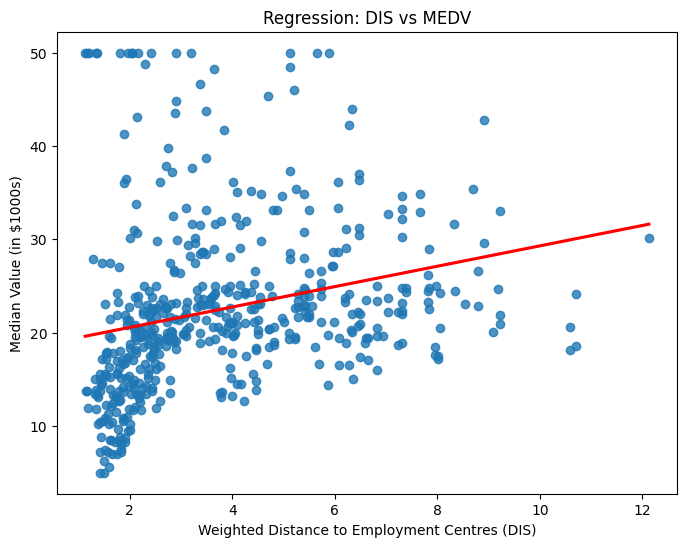

In [17]:
# Regression analysis for DIS and MEDV
X = sm.add_constant(boston_df['DIS']) 
model = sm.OLS(boston_df['MEDV'], X).fit()
print(model.summary())

# Plot regression line for easier understanding
plt.figure(figsize=(8, 6))
sns.regplot(x='DIS', y='MEDV', data=boston_df, ci=None, line_kws={'color': 'red'})
plt.title('Regression: DIS vs MEDV')
plt.xlabel('Weighted Distance to Employment Centres (DIS)')
plt.ylabel('Median Value (in $1000s)')
plt.show()